<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_008_pandas/_002_moving_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시스템에 설치된 폰트 출력

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# 코로나 확진자 데이터

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df_co = pd.read_csv('https://docs.google.com/spreadsheets/u/0/d/1P7s-aD5dYr2355iqFRX1CUxpjbHhl4SYnjT5sP4Iy10/export?format=csv&id=1P7s-aD5dYr2355iqFRX1CUxpjbHhl4SYnjT5sP4Iy10&gid=0')
df_co.head(1)

,연번,확진일,지역,접촉력,노출여부
0,6103,11.02.,동작구,감염경로 조사중,Y


In [ ]:
df_co.tail(1)

,연번,확진일,지역,접촉력,노출여부
6102,1,1.24.,강서구,해외 접촉,Y


확진일    지역    확진일  
1.24.  강서구   1.24.    1
1.30.  마포구   1.30.    1
       종로구   1.30.    1
       중랑구   1.30.    1
1.31.  성북구   1.31.    1
                     ..
9.30.  성동구   9.30.    4
       송파구   9.30.    2
       영등포구  9.30.    1
       용산구   9.30.    1
       중랑구   9.30.    1
Name: 확진일, Length: 2523, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


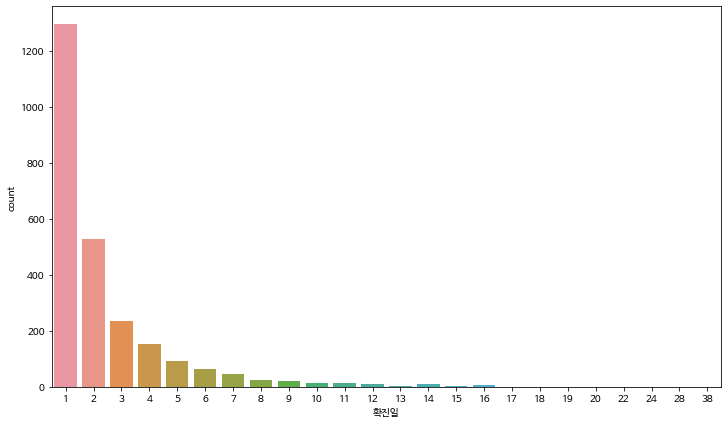

In [ ]:
s = df_co.groupby(by=['확진일', '지역'])

print(s['확진일'].value_counts())
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

sns.countplot(s['확진일'].value_counts(), data=pd.DataFrame(s), ax=ax)

In [ ]:
s['확진일'].describe()

count unique    top freq
확진일   지역                           
1.24. 강서구      1      1  1.24.    1
1.30. 마포구      1      1  1.30.    1
      종로구      1      1  1.30.    1
      중랑구      1      1  1.30.    1
1.31. 성북구      1      1  1.31.    1
...          ...    ...    ...  ...
9.30. 성동구      4      1  9.30.    4
      송파구      2      1  9.30.    2
      영등포구     1      1  9.30.    1
      용산구      1      1  9.30.    1
      중랑구      1      1  9.30.    1

[2523 rows x 4 columns]

In [ ]:
s['지역'].describe()

count unique   top freq
확진일   지역                          
1.24. 강서구      1      1   강서구    1
1.30. 마포구      1      1   마포구    1
      종로구      1      1   종로구    1
      중랑구      1      1   중랑구    1
1.31. 성북구      1      1   성북구    1
...          ...    ...   ...  ...
9.30. 성동구      4      1   성동구    4
      송파구      2      1   송파구    2
      영등포구     1      1  영등포구    1
      용산구      1      1   용산구    1
      중랑구      1      1   중랑구    1

[2523 rows x 4 columns]

# 서울시 유동인구 데이터 By SKT

[SKT DATA HUB](https://www.bigdatahub.co.kr/product/list.do?menu_id=1000157)

2020년 9월 ~ 2019년 3월

```javascript
const result = Array.from(document.querySelectorAll('.category_detail.clfix .title a')).reduce((acc, v) => {
  acc.push(v.getAttribute('href').split('pid=')[1]); 
  return acc
  }, [])

  result > ["1002332", "1002326", "1002317", "1002308", "1002302", "1002299", "1002295", "1002291", "1002286", "1002280", "1002277", "1002261", "1002260", "1002259", "1002258", "1002257", "1002256", "1002255", "1002254"]

```

In [ ]:
# import requests
# import json
# api_key = '7b3aad087b55453cd26409ab572d8407e117a28b737c2ccd19509d0f61edc161'
# # 2020.09, 2020.08 ... 2019.03
# pids = ["1002332", "1002326", "1002317", "1002308", "1002302", "1002299", "1002295", "1002291", "1002286", "1002280", "1002277", "1002261", "1002260", "1002259", "1002258", "1002257", "1002256", "1002255", "1002254"]

# df = pd.DataFrame(data=None, columns=['일자', '시간(1시간단위)', '연령대(10세단위)', '성별', '시', '군구', '유동인구수'])

## 유동인구 csv 파일 구글 드라이브로 이동 후 불러오기

```javascript

const dates = `2019-11 2019-12 2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08 2020-09 2019-03 2019-04 2019-05 2019-06 2019-07 2019-08 2019-09 2019-10`.split(" ")

const result = Array.from(document.querySelectorAll('div[jsname="LpMIEc"].iZmuQc [data-id]'))
.reduce((acc, v, i) => {
  acc.push({id: v.dataset.id, date: dates[i]}); 
  return acc;
  }, [])


result > 0: {id: "1lBVb8yPB5HY3XRIC1vL3T795ZB0MD6jE", date: "2019-11"}
1: {id: "1W_b2c455hGpS84XzQdz7dmtjchyYurwU", date: "2019-12"}
2: {id: "1F7aRc4kL8x690Zz7nevlnF3PAxCxFOFC", date: "2020-01"}
3: {id: "12ZFfiI-br9cpt-YdfOyqr756CuoeeqX_", date: "2020-02"}
4: {id: "1OBBYjT7tNy85J5RX7FeWY4WDqA_ASYu_", date: "2020-03"}
5: {id: "1s576x4De8vI1Q3L-r__8s0pXiBsgJ82B", date: "2020-04"}
6: {id: "146ncu-i1Jm025y73-YAAIh5RUm68_OMl", date: "2020-05"}
7: {id: "1QVYdBeVYgq2ylqGOnotYNp6TCHOgHntm", date: "2020-06"}
8: {id: "1Wq9A8UMlOXuJ6anGuh4h1u7NgtwxjO6J", date: "2020-07"}
9: {id: "1Jer8rxhCiiBSg3uy6S-TpVufyH5nFvTm", date: "2020-08"}
10: {id: "1j1pKavboE28ma9aR1-kW189JMy-hMnWA", date: "2020-09"}
11: {id: "1xo-2PxlKcyKJsO9a1YMDXHHueO1i0lXH", date: "2019-03"}
12: {id: "18f-o_mbU91s4rTfKM3eYTjVEA0xpI0q8", date: "2019-04"}
13: {id: "1Z8RBW7pA7X4a4gMaBDHqILjgppWZAGEO", date: "2019-05"}
14: {id: "1ZlBNZ7GMIn0hWh2bqkUst2OG0pWzeVZr", date: "2019-06"}
15: {id: "1E78FWNsJrZJlBPeBmy9gzlSdldZa6tyE", date: "2019-07"}
16: {id: "18p5lp7_bqns6wEZB8bLY9bOBPx1bC-SU", date: "2019-08"}
17: {id: "1wdjos1LubTFkTAkTnbic3abA43b5rq4P", date: "2019-09"}
18: {id: "1ZSzGW2tTneROe67Z6JHYGxX5hgLhCbtX", date: "2019-10"}
```
result > ![결과 화면]('https://drive.google.com/file/d/1OV-uxZQCd_822FVc5R4iRCTwv9Ua4Pf6/view?usp=sharing')

구글 파일 id와 날짜를 손으로 매칭시킨다.

In [ ]:
ids = [
{"id": "1lBVb8yPB5HY3XRIC1vL3T795ZB0MD6jE", "date": "2019-11"},
{"id": "1W_b2c455hGpS84XzQdz7dmtjchyYurwU", "date": "2019-12"},
{"id": "1F7aRc4kL8x690Zz7nevlnF3PAxCxFOFC", "date": "2020-01"},
{"id": "12ZFfiI-br9cpt-YdfOyqr756CuoeeqX_", "date": "2020-02"},
{"id": "1OBBYjT7tNy85J5RX7FeWY4WDqA_ASYu_", "date": "2020-03"},
{"id": "1s576x4De8vI1Q3L-r__8s0pXiBsgJ82B", "date": "2020-04"},
{"id": "146ncu-i1Jm025y73-YAAIh5RUm68_OMl", "date": "2020-05"},
{"id": "1QVYdBeVYgq2ylqGOnotYNp6TCHOgHntm", "date": "2020-06"},
{"id": "1Wq9A8UMlOXuJ6anGuh4h1u7NgtwxjO6J", "date": "2020-07"},
{"id": "1Jer8rxhCiiBSg3uy6S-TpVufyH5nFvTm", "date": "2020-08"},
{"id": "1j1pKavboE28ma9aR1-kW189JMy-hMnWA", "date": "2020-09"},
{"id": "1xo-2PxlKcyKJsO9a1YMDXHHueO1i0lXH", "date": "2019-03"},
{"id": "18f-o_mbU91s4rTfKM3eYTjVEA0xpI0q8", "date": "2019-04"},
{"id": "1Z8RBW7pA7X4a4gMaBDHqILjgppWZAGEO", "date": "2019-05"},
{"id": "1ZlBNZ7GMIn0hWh2bqkUst2OG0pWzeVZr", "date": "2019-06"},
{"id": "1E78FWNsJrZJlBPeBmy9gzlSdldZa6tyE", "date": "2019-07"},
{"id": "18p5lp7_bqns6wEZB8bLY9bOBPx1bC-SU", "date": "2019-08"},
{"id": "1wdjos1LubTFkTAkTnbic3abA43b5rq4P", "date": "2019-09"},
{"id": "1ZSzGW2tTneROe67Z6JHYGxX5hgLhCbtX", "date": "2019-10"}]


In [ ]:
# 날짜 기준으로 정렬하기
ids.sort(key=lambda x: x['date'])

In [ ]:
ids

[{'date': '2019-03', 'id': '1xo-2PxlKcyKJsO9a1YMDXHHueO1i0lXH'},
 {'date': '2019-04', 'id': '18f-o_mbU91s4rTfKM3eYTjVEA0xpI0q8'},
 {'date': '2019-05', 'id': '1Z8RBW7pA7X4a4gMaBDHqILjgppWZAGEO'},
 {'date': '2019-06', 'id': '1ZlBNZ7GMIn0hWh2bqkUst2OG0pWzeVZr'},
 {'date': '2019-07', 'id': '1E78FWNsJrZJlBPeBmy9gzlSdldZa6tyE'},
 {'date': '2019-08', 'id': '18p5lp7_bqns6wEZB8bLY9bOBPx1bC-SU'},
 {'date': '2019-09', 'id': '1wdjos1LubTFkTAkTnbic3abA43b5rq4P'},
 {'date': '2019-10', 'id': '1ZSzGW2tTneROe67Z6JHYGxX5hgLhCbtX'},
 {'date': '2019-11', 'id': '1lBVb8yPB5HY3XRIC1vL3T795ZB0MD6jE'},
 {'date': '2019-12', 'id': '1W_b2c455hGpS84XzQdz7dmtjchyYurwU'},
 {'date': '2020-01', 'id': '1F7aRc4kL8x690Zz7nevlnF3PAxCxFOFC'},
 {'date': '2020-02', 'id': '12ZFfiI-br9cpt-YdfOyqr756CuoeeqX_'},
 {'date': '2020-03', 'id': '1OBBYjT7tNy85J5RX7FeWY4WDqA_ASYu_'},
 {'date': '2020-04', 'id': '1s576x4De8vI1Q3L-r__8s0pXiBsgJ82B'},
 {'date': '2020-05', 'id': '146ncu-i1Jm025y73-YAAIh5RUm68_OMl'},
 {'date': '2020-06', 'id'

In [ ]:
def download_path_by_id(id: str) -> str:
  return f'https://drive.google.com/uc?id={id}&authuser=0&export=download'

df_origin = pd.DataFrame(data=None, columns=['일자', '시간(1시간단위)', '연령대(10세단위)', '성별', '시', '군구', '유동인구수'])

for x in ids:
  f_id = download_path_by_id(x['id'])
  print(x['date'], f_id)
  df_origin = df_origin.append(pd.read_csv(f_id))

df_origin.tail(1)

2019-03 https://drive.google.com/uc?id=1xo-2PxlKcyKJsO9a1YMDXHHueO1i0lXH&authuser=0&export=download
2019-04 https://drive.google.com/uc?id=18f-o_mbU91s4rTfKM3eYTjVEA0xpI0q8&authuser=0&export=download
2019-05 https://drive.google.com/uc?id=1Z8RBW7pA7X4a4gMaBDHqILjgppWZAGEO&authuser=0&export=download
2019-06 https://drive.google.com/uc?id=1ZlBNZ7GMIn0hWh2bqkUst2OG0pWzeVZr&authuser=0&export=download
2019-07 https://drive.google.com/uc?id=1E78FWNsJrZJlBPeBmy9gzlSdldZa6tyE&authuser=0&export=download
2019-08 https://drive.google.com/uc?id=18p5lp7_bqns6wEZB8bLY9bOBPx1bC-SU&authuser=0&export=download
2019-09 https://drive.google.com/uc?id=1wdjos1LubTFkTAkTnbic3abA43b5rq4P&authuser=0&export=download
2019-10 https://drive.google.com/uc?id=1ZSzGW2tTneROe67Z6JHYGxX5hgLhCbtX&authuser=0&export=download
2019-11 https://drive.google.com/uc?id=1lBVb8yPB5HY3XRIC1vL3T795ZB0MD6jE&authuser=0&export=download
2019-12 https://drive.google.com/uc?id=1W_b2c455hGpS84XzQdz7dmtjchyYurwU&authuser=0&export=download


,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
215699,20200930,21,70,여성,서울,관악구,21050


In [175]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4155600 entries, 0 to 215699
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   일자          object
 1   시간(1시간단위)   object
 2   연령대(10세단위)  object
 3   성별          object
 4   시           object
 5   군구          object
 6   유동인구수       object
dtypes: object(7)
memory usage: 253.6+ MB


In [183]:
df = df_origin.copy()

In [184]:
df['일자'] = df['일자'].apply(str)
df['일자'] = df['일자'].apply(lambda s: '-'.join([s[:4], s[4:6], s[6:8]]))
df['일자'] = pd.to_datetime(df['일자'], format='%Y-%m-%d')

In [185]:
df.head(1)

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,2019-03-01,0,20,남성,서울,양천구,28720


In [196]:
date_time = df.iloc[30000, 0]
date_time.weekday(), date_time.day_name()

(0, 'Monday')

In [203]:
date_time.day

11

In [180]:
df['요일'] = df['일자'].apply(lambda x: x.day_name())
df.head(1)

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수,요일
0,2019-03-01,0,20,남성,서울,양천구,28720,Friday


In [181]:
df['유동인구수'] = df['유동인구수'].apply(int)
df['연령대(10세단위)'] = df['연령대(10세단위)'].apply(int)
df['시간(1시간단위)'] = df['시간(1시간단위)'].apply(int)
df['성별'] = np.where(df['성별'] == '남성', 1, 2)


In [182]:
# df.drop(columns=['시'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4155600 entries, 0 to 215699
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   일자          datetime64[ns]
 1   시간(1시간단위)   int64         
 2   연령대(10세단위)  int64         
 3   성별          int64         
 4   군구          object        
 5   유동인구수       int64         
 6   요일          object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 253.6+ MB


## 사회적 거리두기 캠페인 기간 - 작년과 비교

2019-08-18 ~ 2019-09-08

2020-08-16 ~ 2020-09-06

월 ~ 일

In [127]:
df_2019 = df[df['일자'] > '2019-08-18']
df_2019 = df_2019[df_2019['일자'] < '2019-09-08']
df_2019_max = df_2019.groupby(['일자', '요일', '군구'])['유동인구수'].max()
df_2019_max.groupby('군구').max()
df_2019_max = pd.DataFrame(df_2019_max, columns=['일자', '유동인구수'])

In [86]:
df_2019_max.groupby('군구').std()

,유동인구수
군구,
강남구,21799.792967
강동구,362.046813
강북구,622.680749
강서구,236.208539
관악구,542.943973
광진구,1186.383270
구로구,910.725564
금천구,5529.329906
노원구,392.609355


In [128]:
df_2020 = df[df['일자'] > '2020-08-16']
df_2020 = df_2020[df_2020['일자'] < '2020-09-06']
df_2020_max = df_2020.groupby(['일자', '요일', '군구'])['유동인구수'].max()

In [129]:
df_2020_max = pd.DataFrame(df_2020_max, columns=['일자', '유동인구수'])

In [130]:
np.array(df_2019_max['유동인구수']) > np.array(df_2020_max['유동인구수'])

array([ True, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False,  True,
        True, False,  True,  True, False,  True, False,  True, False,
       False,  True, False, False,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False, False, False, False,  True,  True, False,  True,  True,
       False,  True, False,  True, False, False,  True, False,  True,
        True, False, False, False,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True,

In [131]:
df_2020_max.drop(columns='일자', inplace=True)
df_2019_max.drop(columns='일자', inplace=True)

df_2020_max = df_2020_max.reset_index()
df_2019_max = df_2019_max.reset_index()

In [169]:
df_2020_max.head(1)

,일자,요일,군구,유동인구수
0,2020-08-17,Monday,강남구,68050


In [170]:
df_2019_max.head(1)

,일자,요일,군구,유동인구수
0,2019-08-19,Monday,강남구,119010


In [208]:

for ko, en in [('강남구', 'gangnam'), ('중구', 'jung')]:
  df_2020_gangnam = df_2020_max[df_2020_max['군구'] == ko]
  df_2019_gangnam = df_2019_max[df_2019_max['군구'] == ko]

  new_df = pd.DataFrame(data=None, columns=['location', 'cnt', 'day_2019_08','day_2020_08', '2019_week', '2020_week', '2019_moving', '2020_moving'])
  # new_df['2019_date'] = df_2019_gangnam['일자']
  # new_df['2020_date'] = df_2020_gangnam['일자']
  new_df['day_2019_08'] = df_2019_gangnam['일자'].apply(lambda x: x.day)
  new_df['day_2020_08'] = df_2020_gangnam['일자'].apply(lambda x: x.day)
  new_df['location'] = df_2019_gangnam['군구'].apply(lambda x: en)
  new_df['2019_week'] = df_2019_gangnam['요일']
  new_df['2020_week'] = df_2020_gangnam['요일']
  new_df['2019_moving'] = df_2019_gangnam['유동인구수']
  new_df['2020_moving'] = df_2020_gangnam['유동인구수']
  new_df['cnt'] = np.arange(1, 21)
  new_df.to_csv(f'new_{en}.csv')

In [ ]:
plot(X2019_week ~ X2019_moving, data=mhgang, type='b', ylab='2019-08', frame=FALSE, col='red',main = '강남구 유동인구 19vs20 비교 ', pch=19)
lines(days:mhgang$X2020_moving, df$X2020_moving, type='b', col='green', pch=18)
legend(0.1, 20, c('2019-08', '2020-08'), fill=c('red', 'green'))

In [ ]:
plot(mhgang$Xcnt, mhgang$X2019_moving, pch=20, type='b', col="#DC143C", xlab="days", ylab="08", main="강남 유동인구")
par(new=TRUE)
plot(mhgang$Xcnt, mhgang$X2020_moving, pch=19, type='b', col="skyblue", xlab="days", ylab="08", main="강남 유동인구")

legend(0.1, 20, c('2019-08', '2020-08'), fill=c('red', 'green'))

In [193]:
df_2020_jung = df_2020_max[df_2020_max['군구'] == '중구']
df_2020_jung

,일자,요일,군구,유동인구수
23,2020-08-17,Monday,중구,23170
48,2020-08-18,Tuesday,중구,55140
73,2020-08-19,Wednesday,중구,53750
98,2020-08-20,Thursday,중구,52980
123,2020-08-21,Friday,중구,50760
148,2020-08-22,Saturday,중구,19950
173,2020-08-23,Sunday,중구,16780
198,2020-08-24,Monday,중구,54320
223,2020-08-25,Tuesday,중구,53800
248,2020-08-26,Wednesday,중구,53070


In [145]:
pd.DataFrame(df_2020_max.groupby(['군구']).min())

,일자,요일,유동인구수
군구,,,
강남구,2020-08-17,Friday,54300
강동구,2020-08-17,Friday,38950
강북구,2020-08-17,Friday,26510
강서구,2020-08-17,Friday,50600
관악구,2020-08-17,Friday,51200
광진구,2020-08-17,Friday,31720
구로구,2020-08-17,Friday,38630
금천구,2020-08-17,Friday,22640
노원구,2020-08-17,Friday,50150


2020년도 유동인구가 줄었음을 확인할 수 있다.

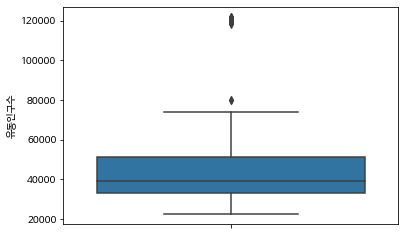

In [107]:
sns.boxplot(y='유동인구수', data=df_2019_max)

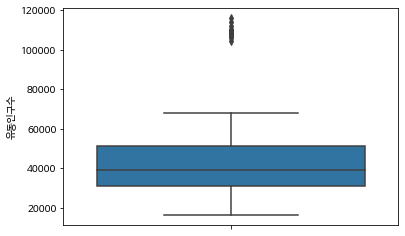

In [93]:
sns.boxplot(y='유동인구수', data=df_2020_max)

In [112]:
sns.pointplot(data=[df_2020_max['유동인구수'], df_2019_max['유동인구수']])

AttributeError: ignored

In [95]:
df_merge = pd.DataFrame(data=None, columns=['day'])
df_merge['day'] = df_2020_max.iloc[:, 1]
df_merge['2020_유동'] = df_2020_max.iloc[:, 2]
df_merge['2019_유동'] = df_2019_max.iloc[:, 2]

In [97]:
df_merge.head(1)

,day,2020_유동,2019_유동
0,Monday,강남구,강남구


In [96]:
sns.pointplot(data=df_merge, x='day', y='2019_유동', color='blue')
sns.pointplot(data=df_merge, x='day', y='2020_유동', color='red')

TypeError: ignored

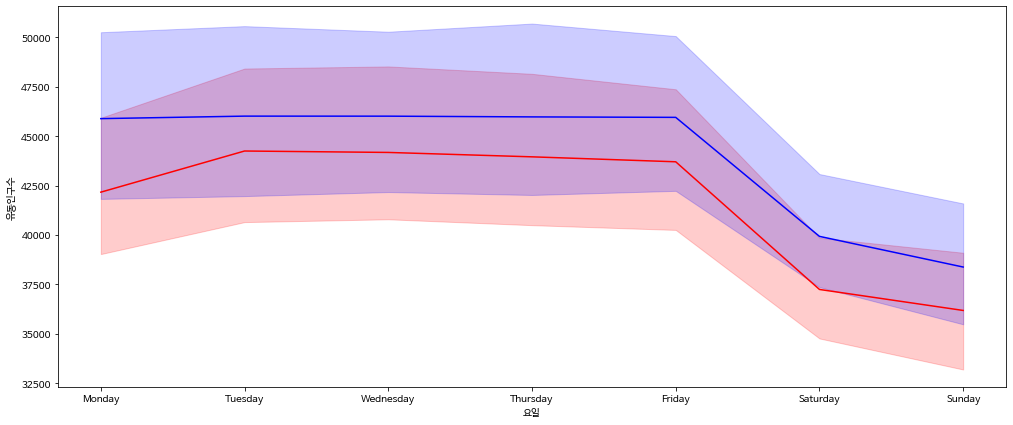

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7))

sns.lineplot(data=df_2020_max, x='요일', y='유동인구수', ax=ax, color='red')
sns.lineplot(data=df_2019_max, x='요일', y='유동인구수', ax=ax, color='blue')

In [100]:
grouped = df.groupby(['군구', '일자', '요일', '시간(1시간단위)'])


In [101]:
max = grouped[['유동인구수']].max().reset_index()
min = grouped[['유동인구수']].min().reset_index()
mean = grouped[['유동인구수']].mean().reset_index()
삼사분위 = grouped[['유동인구수']].std(75).reset_index()


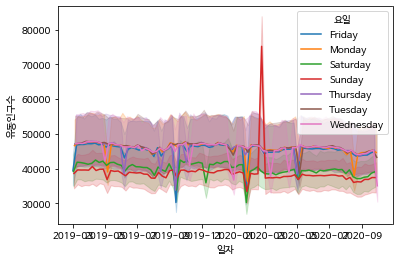

In [102]:
군구_유동_최대 = pd.DataFrame(max.groupby(['군구', '요일', '일자'])['유동인구수'].max(), columns=['유동인구수']).reset_index()
# plt.xticks(rotation=90)
sns.lineplot(data=군구_유동_최대, x='일자', y='유동인구수', hue='요일')

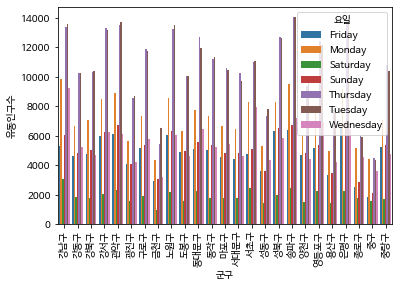

In [103]:
군구_유동_최소 = pd.DataFrame(min.groupby(['군구', '요일'])['유동인구수'].min(), columns=['유동인구수']).reset_index()
plt.xticks(rotation=90)
sns.barplot(data=군구_유동_최소, x='군구', y='유동인구수', hue='요일')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


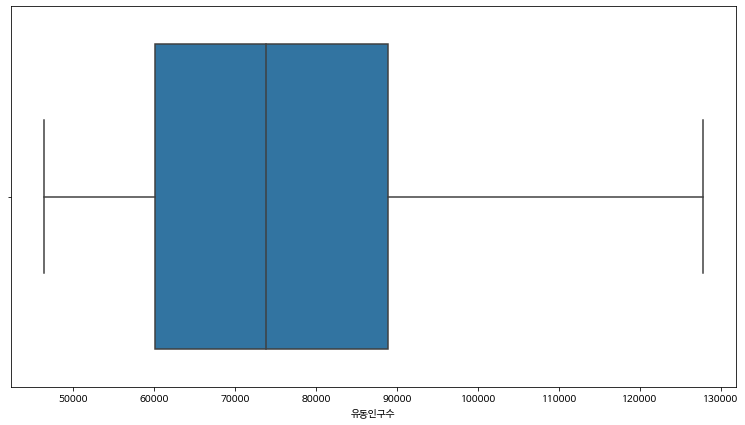

In [104]:
fig. ax = plt.subplots(1, 1, figsize=(13, 7))

sns.boxplot(max.groupby('군구')['유동인구수'].max())

## 유동인구 최대 (군구, 요일)

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(27, 30))

plt.xticks(rotation=90)
sns.barplot(data=max, x='군구', y='유동인구수', hue='요일', ax=ax[0])
sns.scatterplot(data=max, x='군구', y='유동인구수', hue='요일', size='시간(1시간단위)', sizes=(50, 330), ax=ax[1])
sns.lineplot(data=max, x='일자', y='유동인구수', hue='요일', ax=ax[2])
sns.pointplot(data=max, x='일자', y='유동인구수', hue='요일', ax=ax[3])

## 유동인구 최소 (군구, 요일)

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(27, 30))

plt.xticks(rotation=90)
sns.barplot(data=min, x='군구', y='유동인구수', hue='요일', ax=ax[0])
sns.scatterplot(data=min, x='군구', y='유동인구수', hue='요일', size='요일', sizes=(50, 330), ax=ax[1])
sns.lineplot(data=min, x='일자', y='유동인구수', hue='요일', ax=ax[2])
sns.pointplot(data=min, x='일자', y='유동인구수', hue='요일', ax=ax[3])

## 유동인구 중간값 (일자, 요일)

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(27, 30))

plt.xticks(rotation=90)
sns.barplot(data=median, x='군구', y='유동인구수', hue='요일', ax=ax[0])
sns.scatterplot(data=median, x='군구', y='유동인구수', hue='요일', size='요일', sizes=(50, 330), ax=ax[1])
sns.lineplot(data=median, x='일자', y='유동인구수', hue='요일', ax=ax[2])
sns.pointplot(data=median, x='일자', y='유동인구수', hue='요일', ax=ax[3])

## 유동인구 제삼사분위 (일자, 요일)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


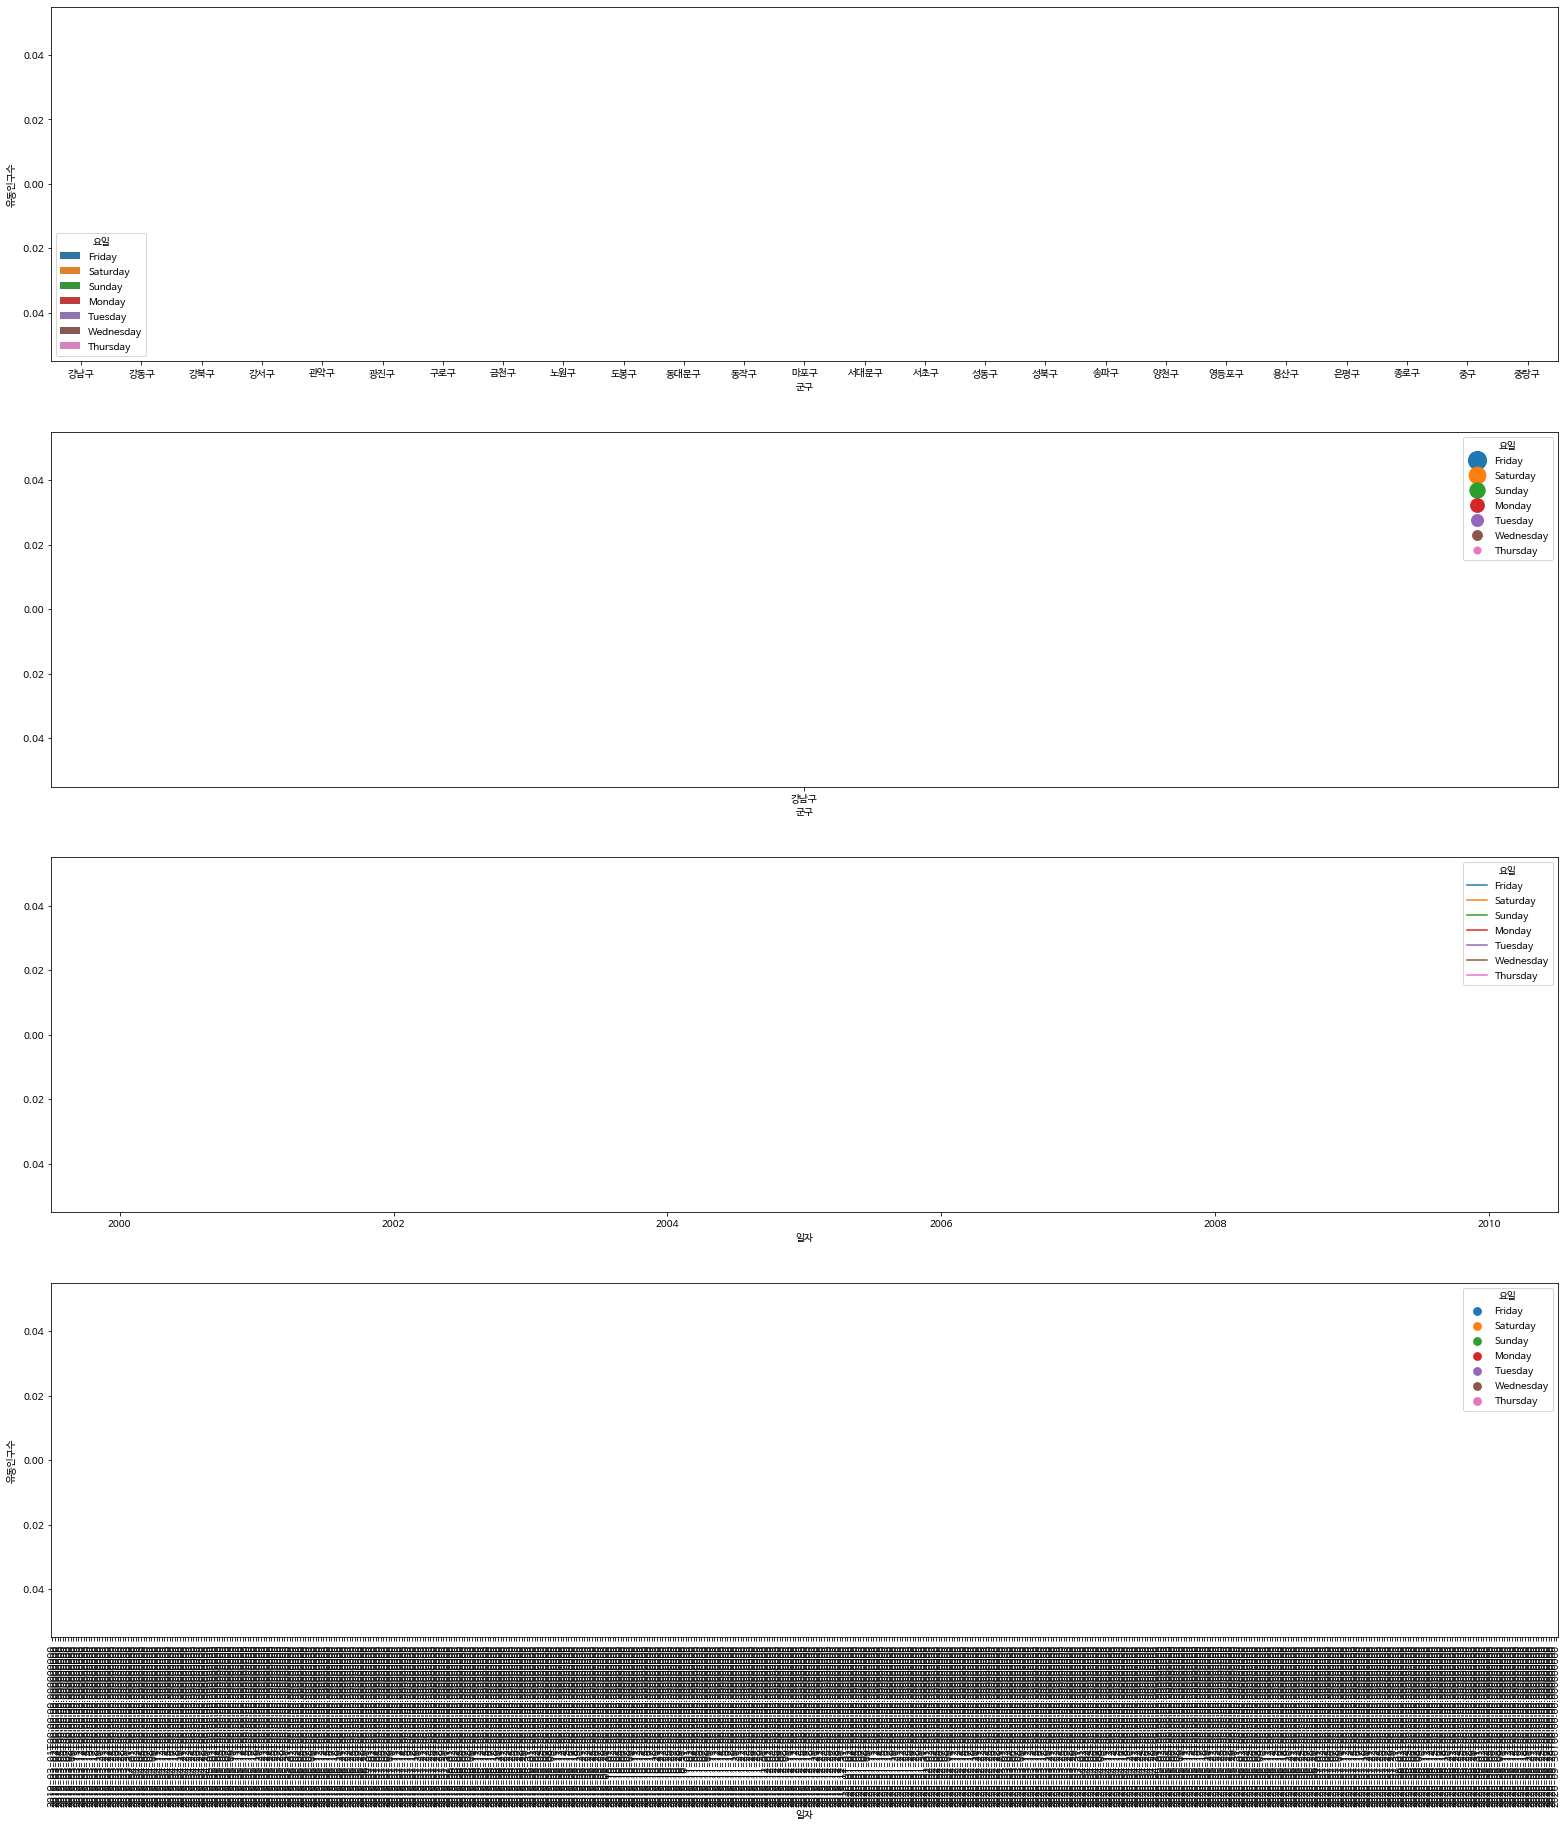

In [105]:
fig, ax = plt.subplots(4, 1, figsize=(27, 30))

plt.xticks(rotation=90)
sns.barplot(data=삼사분위, x='군구', y='유동인구수', hue='요일', ax=ax[0])
sns.scatterplot(data=삼사분위, x='군구', y='유동인구수', hue='요일', size='요일', sizes=(50, 330), ax=ax[1])
sns.lineplot(data=삼사분위, x='일자', y='유동인구수', hue='요일', ax=ax[2])
sns.pointplot(data=삼사분위, x='일자', y='유동인구수', hue='요일', ax=ax[3])

In [ ]:
import pandas as pd

df_org = pd.read_csv('https://drive.google.com/uc?id=1Jer8rxhCiiBSg3uy6S-TpVufyH5nFvTm&authuser=0&export=download')


In [ ]:
df_org = df.copy()

In [ ]:
df = df_org.drop(columns=['연령대(10세단위)', '시', '성별', '시간(1시간단위)'])
df['일자'] = df['일자'].apply(str)
df['일자'] = df['일자'].apply(lambda s: '-'.join([s[:4], s[4:6], s[6:8]]))
df['일자'] = pd.to_datetime(df['일자'], format='%Y-%m-%d')

In [ ]:
df_gangnam = df[df['군구'] == '강남구']
df_jung = df[df['군구'] == '중구']

In [ ]:
df_gangnam.head(1)

,일자,군구,유동인구수
6,2020-08-01,강남구,39950


In [ ]:
df_gangnam.head(6)

,일자,군구,유동인구수
6,2020-08-01,강남구,39950
39,2020-08-01,강남구,15640
44,2020-08-01,강남구,41440
71,2020-08-02,강남구,23580
105,2020-08-02,강남구,41040
110,2020-08-02,강남구,15070
